# Airbnb Project

Airbnb is an online marketplace and hospitality service, enabling people to lease or rent short-term lodging including vacation rentals, apartment rentals, homestays, hostel beds, or hotel rooms. The company does not own any lodging; it is merely a broker & receives percentage service fees (commissions) from both guests & hosts in conjunction with every booking. In this project, there are 2 sections:

1. [Exploratory Data Analysis](#1)

I want to use questions to guide my exploration of the dataset, to pick up on any trends or insights on the different neighborhoods, the pricing, as well as the satisfaction levels based on reviews.

2. [Application](#2)

I want to create an application for customers to visualise possible listings on a map depending on their conditions for **price**, **overall satisfaction (number of stars)**, & **neighborhood**. Prospective hosts can also use the application to give them a gauge on the **price to set** per night for their listing, which will be calculated by taking the average prices of the other listings within the same neighborhood.

In [1]:
# importing the data

import csv

with open("airbnb_data.csv", newline = "") as csvfile:
    reader = csv.DictReader(csvfile)
    airbnb_data = []
    
    for row in reader:
        airbnb_data.append(dict(row))
        
print(airbnb_data[:3])

[{'listing_id': '1133718', 'survey_id': '1280', 'host_id': '6219420', 'room_type': 'Shared room', 'country': '', 'city': 'Singapore', 'borough': '', 'neighborhood': 'MK03', 'reviews': '9', 'overall_satisfaction': '4.5', 'accommodates': '12', 'bedrooms': '1.0', 'bathrooms': '', 'price': '74.0', 'minstay': '', 'last_modified': '2017-05-17 09:10:25.431659', 'latitude': '1.293354', 'longitude': '103.769226', 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}, {'listing_id': '3179080', 'survey_id': '1280', 'host_id': '15295886', 'room_type': 'Shared room', 'country': '', 'city': 'Singapore', 'borough': '', 'neighborhood': 'TS17', 'reviews': '15', 'overall_satisfaction': '5.0', 'accommodates': '12', 'bedrooms': '1.0', 'bathrooms': '', 'price': '77.0', 'minstay': '', 'last_modified': '2017-05-17 09:10:24.216548', 'latitude': '1.310862', 'longitude': '103.858828', 'location': '0101000020E6100000E738B709F7F659403F1BB96E4AF9F43F'}, {'listing_id': '15303457', 'survey_id': '1280', '

## Data Cleaning

In [2]:
# changing the data type of all numerical values into appropriate data types

for row in airbnb_data:
    row["reviews"] = int(row["reviews"])
    row["overall_satisfaction"] = float(row["overall_satisfaction"])
    row["accommodates"] = int(row["accommodates"])
    row["bedrooms"] = float(row["bedrooms"])
    row["price"] = float(row["price"])
    row["latitude"] = float(row["latitude"])
    row["longitude"] = float(row["longitude"])
    
print(airbnb_data[:3])

[{'listing_id': '1133718', 'survey_id': '1280', 'host_id': '6219420', 'room_type': 'Shared room', 'country': '', 'city': 'Singapore', 'borough': '', 'neighborhood': 'MK03', 'reviews': 9, 'overall_satisfaction': 4.5, 'accommodates': 12, 'bedrooms': 1.0, 'bathrooms': '', 'price': 74.0, 'minstay': '', 'last_modified': '2017-05-17 09:10:25.431659', 'latitude': 1.293354, 'longitude': 103.769226, 'location': '0101000020E6100000E84EB0FF3AF159409C69C2F693B1F43F'}, {'listing_id': '3179080', 'survey_id': '1280', 'host_id': '15295886', 'room_type': 'Shared room', 'country': '', 'city': 'Singapore', 'borough': '', 'neighborhood': 'TS17', 'reviews': 15, 'overall_satisfaction': 5.0, 'accommodates': 12, 'bedrooms': 1.0, 'bathrooms': '', 'price': 77.0, 'minstay': '', 'last_modified': '2017-05-17 09:10:24.216548', 'latitude': 1.310862, 'longitude': 103.858828, 'location': '0101000020E6100000E738B709F7F659403F1BB96E4AF9F43F'}, {'listing_id': '15303457', 'survey_id': '1280', 'host_id': '97053568', 'room_

<a id='1'><h2><font color="salmon">&nbsp;1.</font><font color="salmon"> Exploratory Data Analysis </font> </h2></a>

#### Q1. List out each neighborhoods & their number of listings

In [3]:
results1 = {}

for row in airbnb_data:
    neighborhood = row["neighborhood"]
   
    if neighborhood not in results1:
        results1[neighborhood ] = 1
    else:
        results1[neighborhood ] += 1

print(results1)

{'MK03': 160, 'TS17': 342, 'MK05': 153, 'MK29': 34, 'TS07': 30, 'TS04': 19, 'TS06': 94, 'TS05': 50, 'TS19': 127, 'TS11': 56, 'TS03': 136, 'TS12': 62, 'TS18': 284, 'TS08': 14, 'MK18': 191, 'TS16': 30, 'MK26': 226, 'MK24': 333, 'MK23': 102, 'TS27': 327, 'MK17': 596, 'MK11': 48, 'TS21': 315, 'MK28': 125, 'MK01': 741, 'MK27': 154, 'MK13': 100, 'MK21': 77, 'MK19': 36, 'TS10': 12, 'MK31': 72, 'MK20': 23, 'MK07': 2, 'MK06': 137, 'TS20': 166, 'MK04': 140, 'MK15': 20, 'MK25': 427, 'TS22': 79, 'TS09': 40, 'MK10': 82, 'TS24': 205, 'TS14': 17, 'MK22': 122, 'MK34': 15, 'TS29': 135, 'TS25': 34, 'TS28': 85, 'TS01': 11, 'TS30': 74, 'TS13': 19, 'MK09': 26, 'MK02': 63, 'TS02': 37, 'TS23': 82, 'TS26': 37, 'MK16': 43, 'TS15': 19, 'MK14': 24, 'MK30': 2}


#### Q2. List out each neighborhood & their average overall_satisfaction

In [4]:
total_overall_satisfaction = {}
total_count = {}

for row in airbnb_data:
    if row["reviews"] > 0:
        neighborhood = row["neighborhood"]
        overall_satisfaction = row["overall_satisfaction"]   
        
        if neighborhood not in total_overall_satisfaction:
            total_overall_satisfaction[neighborhood] = overall_satisfaction
        else:
            total_overall_satisfaction[neighborhood] += overall_satisfaction

for row in airbnb_data:
    if row["reviews"] > 0:
        neighborhood = row["neighborhood"]
        
        if neighborhood not in total_count:
            total_count[neighborhood] = 1
        else:
            total_count[neighborhood] += 1

results2 = {}

for neighborhood, count in total_count.items():
    overall_satisfaction = total_overall_satisfaction[neighborhood]
    results2[neighborhood] = round(overall_satisfaction / count, 2)
    
print(results2)

{'MK03': 2.67, 'TS17': 2.86, 'TS07': 2.0, 'TS04': 2.96, 'TS06': 3.35, 'TS05': 4.32, 'TS11': 3.12, 'TS03': 3.64, 'TS12': 3.45, 'TS18': 3.11, 'TS08': 3.18, 'MK26': 3.34, 'TS21': 3.27, 'TS27': 3.01, 'MK01': 2.63, 'TS19': 2.99, 'TS10': 3.75, 'MK06': 3.07, 'MK04': 2.82, 'MK21': 3.21, 'MK13': 3.31, 'MK19': 2.97, 'TS09': 3.63, 'TS16': 4.29, 'MK05': 3.18, 'MK18': 3.27, 'TS24': 3.13, 'MK10': 2.8, 'MK17': 2.75, 'TS22': 3.02, 'MK24': 3.26, 'TS14': 2.92, 'MK22': 2.79, 'MK25': 3.54, 'TS20': 3.37, 'TS29': 2.54, 'TS28': 3.55, 'MK23': 2.99, 'TS30': 3.62, 'MK28': 2.99, 'MK31': 2.85, 'TS13': 2.97, 'MK34': 1.67, 'TS01': 2.38, 'MK02': 3.49, 'TS25': 3.0, 'TS26': 3.5, 'TS23': 2.94, 'TS02': 4.02, 'MK27': 3.28, 'MK15': 3.15, 'MK11': 3.25, 'MK20': 2.19, 'MK16': 3.2, 'MK29': 3.56, 'TS15': 4.19, 'MK14': 2.69, 'MK09': 2.72, 'MK30': 2.25}


#### Q3. List out each neighborhood & their average price

In [5]:
total_price = {}
total_count = {}

for row in airbnb_data:
    neighborhood = row["neighborhood"]
    price = row["price"]
    
    if neighborhood not in total_price:
        total_price[neighborhood] = price
    else:
        total_price[neighborhood] += price
        
for row in airbnb_data:
    neighborhood = row["neighborhood"]
    
    if neighborhood not in total_count:
        total_count[neighborhood] = 1
    else:
        total_count[neighborhood] += 1
        
results3 = {}

for neighborhood, count in total_count.items():
    price = total_price[neighborhood]
    results3[neighborhood] = round(price / count, 2)

print(results3)

{'MK03': 76.92, 'TS17': 95.57, 'MK05': 96.59, 'MK29': 64.15, 'TS07': 76.9, 'TS04': 90.58, 'TS06': 79.31, 'TS05': 138.42, 'TS19': 105.24, 'TS11': 110.89, 'TS03': 140.1, 'TS12': 85.18, 'TS18': 134.6, 'TS08': 73.79, 'MK18': 84.63, 'TS16': 77.03, 'MK26': 86.35, 'MK24': 79.07, 'MK23': 79.82, 'TS27': 191.94, 'MK17': 145.51, 'MK11': 70.62, 'TS21': 137.06, 'MK28': 75.07, 'MK01': 108.57, 'MK27': 71.22, 'MK13': 61.33, 'MK21': 71.19, 'MK19': 77.22, 'TS10': 90.92, 'MK31': 77.56, 'MK20': 88.09, 'MK07': 84.5, 'MK06': 60.78, 'TS20': 109.7, 'MK04': 95.37, 'MK15': 114.0, 'MK25': 87.17, 'TS22': 79.42, 'TS09': 129.93, 'MK10': 70.11, 'TS24': 106.61, 'TS14': 58.82, 'MK22': 73.86, 'MK34': 1428.67, 'TS29': 149.71, 'TS25': 148.74, 'TS28': 116.36, 'TS01': 279.18, 'TS30': 213.51, 'TS13': 107.0, 'MK09': 47.65, 'MK02': 111.33, 'TS02': 153.49, 'TS23': 99.59, 'TS26': 107.54, 'MK16': 66.21, 'TS15': 67.47, 'MK14': 44.58, 'MK30': 33.0}


#### Q4. Plot a distribution of counts of the overall_satisfaction

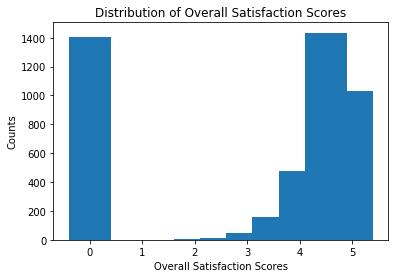

In [7]:
import matplotlib.pyplot as plt

score_count = {}
score_count_tuple = []

for row in airbnb_data:
    reviews = row["reviews"]
    overall_satisfaction = row["overall_satisfaction"]
    
    if reviews > 0:
        if overall_satisfaction not in score_count:
            score_count[overall_satisfaction] = 1
        else:
            score_count[overall_satisfaction] += 1

for data in score_count.items():
    score_count_tuple.append(tuple(data))

score = []
count = []

for row in score_count_tuple:
    score.append(row[0])
    count.append(row[1])

x = score
y = count

plt.bar(x, y)
plt.title("Distribution of Overall Satisfaction Scores")
plt.xlabel("Overall Satisfaction Scores")
plt.ylabel("Counts")
plt.show()

#### Q5. Plot a geographical representation of all of the listings in Singapore

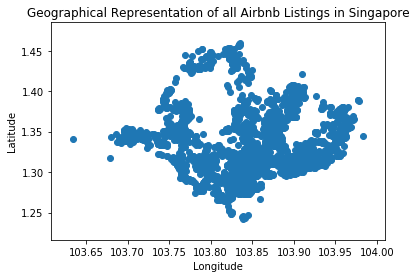

In [8]:
long_list = []
lat_list = []

for row in airbnb_data:
    longitude = row["longitude"]
    latitude = row["latitude"]
    long_list.append(longitude)
    lat_list.append(latitude)

plt.scatter(long_list, lat_list)
plt.title("Geographical Representation of all Airbnb Listings in Singapore")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

<a id='2'><h2><font color="salmon">&nbsp;2.</font><font color="salmon"> Creating an Airbnb Application for Customers & Hosts </font> </h2></a>

In [9]:
# creating a function to collect all the latitudes

def get_all_latitude(data, r_listing_id):
    results = []
    
    for row in data:
        latitude = row["latitude"]
        listing_id = row["listing_id"]
        
        if listing_id in r_listing_id:
            results.append(latitude)
            
    return results

In [10]:
# creating a function to collect all the longitudes

def get_all_longitude(data, r_listing_id):
    results = []
    
    for row in data:
        longitude = row["longitude"]
        listing_id = row["listing_id"]
        
        if listing_id in r_listing_id:
            results.append(longitude)
            
    return results

In [11]:
# create the function that recommends listings to users based on a given price, satisfaction score & neighborhood

def listings_recommender(data, r_price, r_overall_satisfaction, r_neighborhood_id):
    results = []
    
    for row in data:
        price = row["price"]
        overall_satisfaction = row["overall_satisfaction"]
        neighborhood = row["neighborhood"]
        listing_id = row["listing_id"]
        
        if price <= r_price and overall_satisfaction >= r_overall_satisfaction and neighborhood == r_neighborhood_id:
            results.append(listing_id)
    
    return results

In [12]:
# creating a function to geographically visualise a given list of listings

import mplleaflet
import matplotlib.pyplot as plt

def visualise_listings(data, list_of_listing_ids):
    list_latitude = []
    list_longitude = []
    
    for row in data:
        latitude = row["latitude"]
        longitude = row["longitude"]
        listing_id = row["listing_id"]
        
        if listing_id in list_of_listing_ids:
            list_latitude.append(latitude)
            list_longitude.append(longitude)
            
    plt.scatter(list_longitude, list_latitude, marker = "*", s = 500, c = "red")
        
    return mplleaflet.show()

In [13]:
# creating a function that tells hosts the recommended price to set based on the neighbourhood

def price_recommender(data, r_neighborhood_id):
    total_price = 0
    count = 0
    
    for row in data:
        reviews = row["reviews"]
        overall_satisfaction = row["overall_satisfaction"]
        neighborhood = row["neighborhood"]
        price = row["price"]
        
        if reviews >= 1 and overall_satisfaction >= 4 and neighborhood == r_neighborhood_id:
            total_price += price
            count += 1
            
            recommended_price = float(total_price / count)
            
    return round(recommended_price, 2)

## Using the Application

#### For customers

In [15]:
neighborhood_to_test = input("Which neighborhood would you like to look into?").upper()
price_to_test = float(input("What is your budget? ($)"))
overall_satisfaction_to_test = float(input("Overall satisfaction score? (out of 5 stars)"))

visualise_listings(airbnb_data, listings_recommender(airbnb_data, price_to_test, overall_satisfaction_to_test, neighborhood_to_test))
print("-----------------------------------------------------------------------------------------------------------------------------")
print("Here are the Listing IDs of the listings that you have filtered: ", listings_recommender(airbnb_data, price_to_test, overall_satisfaction_to_test, neighborhood_to_test))

Which neighborhood would you like to look into?ts17
What is your budget? ($)100
Overall satisfaction score? (out of 5 stars)4
-----------------------------------------------------------------------------------------------------------------------------
Here are the Listing IDs of the listings that you have filtered:  ['3179080', '10020525', '14489603', '12499007', '12367610', '9738917', '12211385', '12367445', '10040869', '9896783', '10040828', '3000736', '10030160', '17562708', '10040969', '10023519', '10040456', '12345284', '10020663', '14489733', '9866970', '9403596', '8897560', '12365867', '9321841', '12366958', '9915648', '10027442', '10021140', '10041012', '9866917', '10021610', '3142075', '10020690', '14679653', '9866651', '9716208', '17672050', '14020243', '14332483', '12366194', '9866904', '10021704', '12367388', '12366660', '10030323', '10040419', '12367245', '12366738', '12347038', '16177101', '15755936', '6023517', '13811978', '15896087', '9391037', '4526703', '14149846', '1

#### For hosts

In [16]:
print("Here is the list of neighborhoods & the number of listings within each of them:", results1)
hosting_neighborhood = input("Which neighborhood is your listing going to be hosted in?").upper()
print("-----------------------------------------------------------------------------------------------------------------------------")
print("The average price of a night's stay around this neighborhood is: $" + str(price_recommender(airbnb_data, hosting_neighborhood)))

Here is the list of neighborhoods & the number of listings within each of them: {'MK03': 160, 'TS17': 342, 'MK05': 153, 'MK29': 34, 'TS07': 30, 'TS04': 19, 'TS06': 94, 'TS05': 50, 'TS19': 127, 'TS11': 56, 'TS03': 136, 'TS12': 62, 'TS18': 284, 'TS08': 14, 'MK18': 191, 'TS16': 30, 'MK26': 226, 'MK24': 333, 'MK23': 102, 'TS27': 327, 'MK17': 596, 'MK11': 48, 'TS21': 315, 'MK28': 125, 'MK01': 741, 'MK27': 154, 'MK13': 100, 'MK21': 77, 'MK19': 36, 'TS10': 12, 'MK31': 72, 'MK20': 23, 'MK07': 2, 'MK06': 137, 'TS20': 166, 'MK04': 140, 'MK15': 20, 'MK25': 427, 'TS22': 79, 'TS09': 40, 'MK10': 82, 'TS24': 205, 'TS14': 17, 'MK22': 122, 'MK34': 15, 'TS29': 135, 'TS25': 34, 'TS28': 85, 'TS01': 11, 'TS30': 74, 'TS13': 19, 'MK09': 26, 'MK02': 63, 'TS02': 37, 'TS23': 82, 'TS26': 37, 'MK16': 43, 'TS15': 19, 'MK14': 24, 'MK30': 2}
Which neighborhood is your listing going to be hosted in?ts17
-------------------------------------------------------------------------------------------------------------------

# END